In [ ]:
import sys

def custom_exc(shell, etype, value, tb, tb_offset=None):
    print("Problem: {}".format(value), file=sys.stderr)
    return None

get_ipython().set_custom_exc((AssertionError,), custom_exc)

In [1]:
import kechain2

In [ ]:
for part in kechain2.parts('Bike', category=None):
    print(part.name, part.id)

In [ ]:
kechain2.part('Bike', category=None)

In [13]:
kechain2.part('Bike').property('Gears').value

60

In [22]:
w = kechain2.part('Front Wheel')
g = w.property('Diameter')

In [23]:
g.value

200.0

In [4]:
kechain2.properties('Diameter')[1].part.property('Spokes').value = 100

In [ ]:
wheel_model = kechain2.part(name='Wheel', category='MODEL')
wheels = kechain2.parts(model=wheel_model.id)

import random

for wheel in wheels:
    wheel.property('Diameter').value = random.random() * 20
    wheel.property('Spokes').value = random.randint(1, 100)

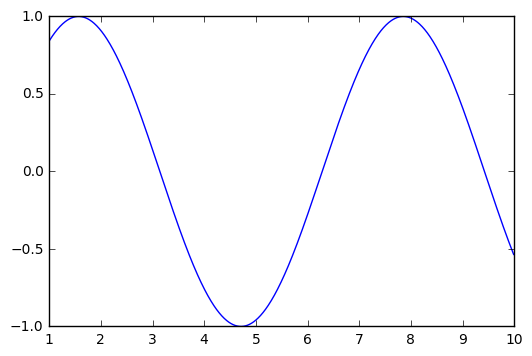

In [11]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(1, 10, 0.01)
y = np.sin(x)

plt.plot(x, y)

kechain2.part('Bike').property('Picture').value = plt.gcf()

plt.show()